# chord_length_distribution

In [1]:
import porespy as ps
import matplotlib.pyplot as plt
ps.visualization.set_mpl_style()

Determines the distribution of chord lengths in an image containing chords.

Create image and variables:

In [2]:
skel = ps.generators.blobs(shape=[300, 300])
branch_points = None
iterations = 10
im = ps.filters.prune_branches(skel, branch_points, iterations)
bins=None
log=False
voxel_size=1
normalization='count'

Apply metric filter:

In [3]:
x = ps.metrics.chord_length_distribution(im, bins, log, voxel_size, normalization)

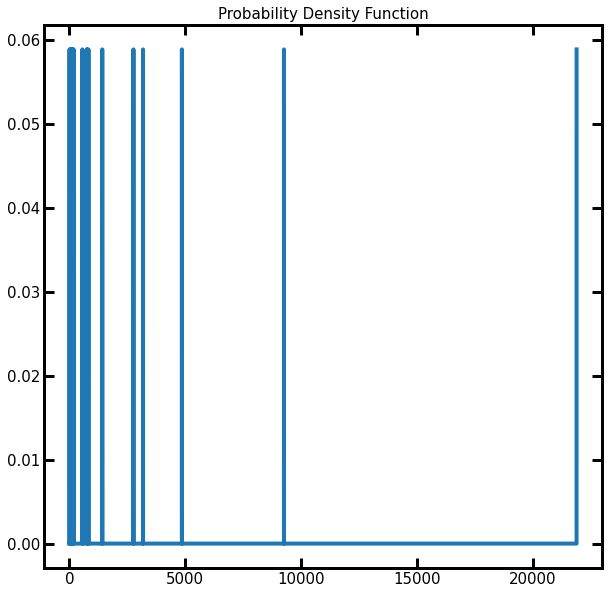

In [4]:
plt.figure(figsize=[10, 10])
plt.title('Probability Density Function')
plt.plot(x.pdf)
plt.show()

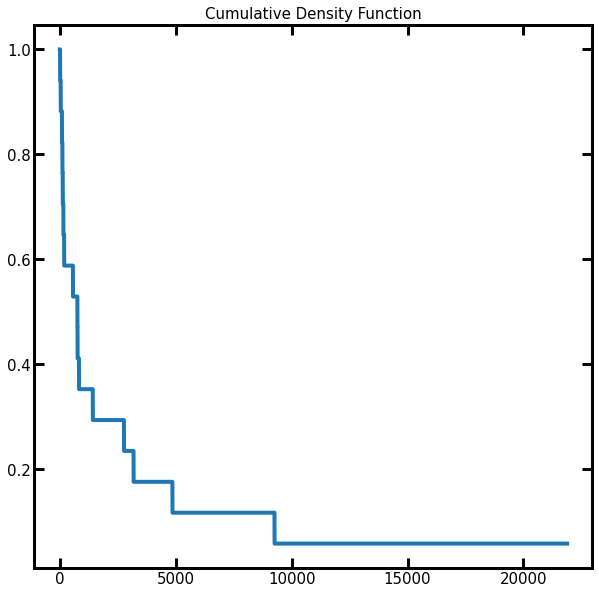

In [5]:
plt.figure(figsize=[10, 10])
plt.title('Cumulative Density Function')
plt.plot(x.cdf)
plt.show()